<a href="https://colab.research.google.com/github/DaringDane/tf-mine-rock-classifier/blob/master/tf_mine_rock_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [0]:
# Read the dataset
def read_dataset():
    df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
    print(len(df.columns))
    X = df[df.columns[1:60]].values
    y = df[df.columns[60]]
    #Encode the dependent variable
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    print(X.shape)
    return(X, Y, y)

In [0]:
# Define one hot encoder function
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

# Above is manual one-hot encoding, but TF has tf.one_hot to do this automatically
# format:
# tf.one_hot(tensor of indices, depth scalar, on_value=(default 1), off_value=(default 0), axis=default -1, dtype)
# returns: One-hot tensor

# tf.one_hot(y, len(np.unique(y)))

In [0]:
#plot the data
def plot_points(features, labels):
    normal = np.where(labels == 0)
    outliers = np.where(labels == 1)
    fig = plt.figure(figsize=(10,8))
    plt.plot(features[normal, 0], features[normal, 1], 'bx')
    plt.plot(features[outliers, 0], features[outliers, 1], 'ro')
    plt.xlabel('Latency (ms)')
    plt.ylabel('Throughput (mb/s)')
    plt.show()

61
(207, 59)


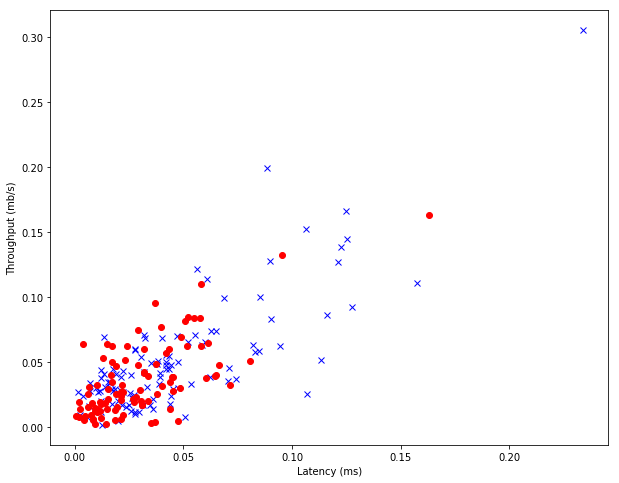

In [6]:
# read the dataset
X, Y, y = read_dataset()
# plot the features and the labels
plot_points(X, y)

## Prepare the data

Preprocessing, such as shuffling and setting a standard random_state seed, establish better consistency and generalizability of training data to test data.

### Set hyperparameters and variables



In [7]:
# Shuffle the dataset to mix up the rows.
X, Y = shuffle(X, Y, random_state=1)
# convert the dataset into train and test parts
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=253)

# inspect the shape of the training and testing sets
print("train_x dims: ", train_x.shape)
print("train_y dims: ",train_y.shape)
print("test_x dims: ", test_x.shape)

# define the important parameters and variables to work with the tensors
learning_rate = 0.2
training_epochs = 1000
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
n_class = 2

# define the number of hidden layers and number of units per layer
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

train_x dims:  (165, 59)
train_y dims:  (165, 2)
test_x dims:  (42, 59)


In [0]:
# Define the model
def multilayer_perceptron(x, weights, biases):
    # hidden layer with ReLU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # hidden layer with ReLU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    # hidden layer with ReLU activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    # hidden layer with ReLU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    # Output layer with linear activation
    
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

epoch :  0  -  cost:  105.37833  - MSE:  13615.446815197545  - Accuracy:  0.5
epoch :  1  -  cost:  8.138668  - MSE:  156.29606209055893  - Accuracy:  0.5
epoch :  2  -  cost:  27.366003  - MSE:  924.9733051775821  - Accuracy:  0.5
epoch :  3  -  cost:  1.1536992  - MSE:  6.921390479038256  - Accuracy:  0.5
epoch :  4  -  cost:  6.45907  - MSE:  62.943427825605966  - Accuracy:  0.5
epoch :  5  -  cost:  3.1065629  - MSE:  11.974060306919219  - Accuracy:  0.5
epoch :  6  -  cost:  0.9720994  - MSE:  2.182071895309332  - Accuracy:  0.5
epoch :  7  -  cost:  1.4082725  - MSE:  3.249563066302779  - Accuracy:  0.5
epoch :  8  -  cost:  1.1010453  - MSE:  1.9292852461085184  - Accuracy:  0.5
epoch :  9  -  cost:  0.69247854  - MSE:  0.5786213720374013  - Accuracy:  0.5
epoch :  10  -  cost:  0.6733932  - MSE:  0.4682810916585146  - Accuracy:  0.54761904
epoch :  11  -  cost:  0.66708976  - MSE:  0.4895824229933339  - Accuracy:  0.61904764
epoch :  12  -  cost:  0.66335326  - MSE:  0.48464817

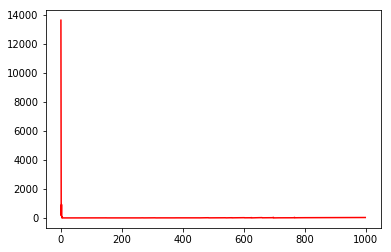

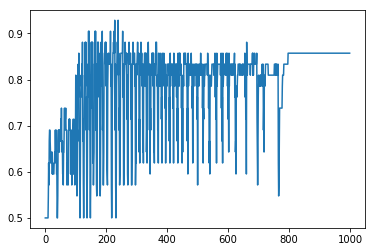

Accuracy:  0.85714287
MSE: 28.6587


In [10]:
# define the weights and biases for each layer
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class])),
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class])),
}

# initialize all the variables

init = tf.global_variables_initializer()

# Call the defined model
y = multilayer_perceptron(x, weights, biases)
# Define the const function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

# Calculate the cost and accuracy for each epoch
mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
  sess.run(training_step, feed_dict={x: train_x, y_: train_y})
  cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
  cost_history = np.append(cost_history, cost)
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  # print("Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
  pred_y = sess.run(y, feed_dict={x: test_x})
  mse = tf.reduce_mean(tf.square(pred_y - test_y))
  mse_ = sess.run(mse)
  mse_history.append(mse_)
  accuracy = (sess.run(accuracy, feed_dict={x: test_x, y_: test_y}))
  accuracy_history.append(accuracy)
  
  print('epoch : ', epoch, ' - ', 'cost: ', cost, ' - MSE: ', mse_, ' - Accuracy: ', accuracy)
  
# plot mse and accuracy graphs
plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

# print final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1,), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

# print the final mean squared error
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))